In [1]:
import pandas as pd
import numpy as np
from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Setting toolkit folder as working directory

%cd /content/drive/MyDrive/[001]-TEC/MCC/Tesis/sentiment-analysis/final-results
! ls

/content/drive/MyDrive/[001]-TEC/MCC/Tesis/sentiment-analysis/final-results
final-results-classifiers.ipynb  player-dataset-sent-wavg.csv


## Data manipulation

In [38]:
df = pd.read_csv('player-dataset-sent-wavg.csv')
print(len(df[df['Pos'] == 'GK']))
df = df[df['Pos'] != 'GK']
df.dropna(subset=['Pos'], inplace=True)
df.drop(columns=['sf_id'], inplace=True)

########### Test different combinations #############
# df.drop(columns=['wg_avg_titles'], inplace=True)
# df.drop(columns=['wg_avg_num_titles'], inplace=True)
# df.drop(columns=['wg_avg_views_titles'], inplace=True)
# df.drop(columns=['wg_avg_comments'], inplace=True)
# df.drop(columns=['wg_avg_num_comments'], inplace=True)

#####################################################

df.reset_index(drop=True, inplace=True)
print(len(df[df['Pos'] == 'GK']))
df = df.fillna(0)
X = df.iloc[:,3:-1]
y = df.iloc[:,-1]
mayority_class = sorted(Counter(y).items())[0][1]
minority_class = sorted(Counter(y).items())[1][1]
ratio = minority_class/(mayority_class + minority_class)
print(f"The dataset has {mayority_class} records for the majority class and {minority_class} records for the minority class.")
print(f'Resulting in {ratio} percentage of the minority class in the entire dataset.')

61
0
The dataset has 1031 records for the majority class and 55 records for the minority class.
Resulting in 0.05064456721915286 percentage of the minority class in the entire dataset.


### RF data

In [28]:
df = pd.read_csv('player-dataset-sent-wavg.csv')
print(len(df[df['Pos'] == 'GK']))
df = df[df['Pos'] != 'GK']
df.dropna(subset=['Pos'], inplace=True)
df.drop(columns=['sf_id'], inplace=True)

########### Test different combinations #############
df.drop(columns=['wg_avg_titles'], inplace=True)
# df.drop(columns=['wg_avg_num_titles'], inplace=True)
# df.drop(columns=['wg_avg_views_titles'], inplace=True)
# df.drop(columns=['wg_avg_comments'], inplace=True)
df.drop(columns=['wg_avg_num_comments'], inplace=True)

#####################################################

print(len(df[df['Pos'] == 'GK']))
df = df.fillna(0)
X_rf = df.iloc[:,3:-1]
y_rf = df.iloc[:,-1]

61
0


### GB data

In [29]:
df = pd.read_csv('player-dataset-sent-wavg.csv')
print(len(df[df['Pos'] == 'GK']))
df = df[df['Pos'] != 'GK']
df.dropna(subset=['Pos'], inplace=True)
df.drop(columns=['sf_id'], inplace=True)

########### Test different combinations #############
df.drop(columns=['wg_avg_titles'], inplace=True)
# df.drop(columns=['wg_avg_num_titles'], inplace=True)
# df.drop(columns=['wg_avg_views_titles'], inplace=True)
# df.drop(columns=['wg_avg_comments'], inplace=True)
# df.drop(columns=['wg_avg_num_comments'], inplace=True)

#####################################################

print(len(df[df['Pos'] == 'GK']))
df = df.fillna(0)
X_gb = df.iloc[:,3:-1]
y_gb = df.iloc[:,-1]

61
0


### SVM data

In [30]:
df = pd.read_csv('player-dataset-sent-wavg.csv')
print(len(df[df['Pos'] == 'GK']))
df = df[df['Pos'] != 'GK']
df.dropna(subset=['Pos'], inplace=True)
df.drop(columns=['sf_id'], inplace=True)

########### Test different combinations #############
# df.drop(columns=['wg_avg_titles'], inplace=True)
# df.drop(columns=['wg_avg_num_titles'], inplace=True)
# df.drop(columns=['wg_avg_views_titles'], inplace=True)
# df.drop(columns=['wg_avg_comments'], inplace=True)
# df.drop(columns=['wg_avg_num_comments'], inplace=True)

#####################################################

print(len(df[df['Pos'] == 'GK']))
df = df.fillna(0)
X_svm = df.iloc[:,3:-1]
y_svm = df.iloc[:,-1]

61
0


In [ ]:
print(len(X.columns))
X.columns

14


Index(['wg_avg_mp', 'wg_avg_min', 'wg_avg_gls', 'wg_avg_asst',
       'wg_avg_gls_asst', 'wg_avg_value', 'wg_avg_ovrl', 'wg_avg_pot',
       'wg_avg_pac', 'wg_avg_sho', 'wg_avg_pas', 'wg_avg_dri', 'wg_avg_def',
       'wg_avg_phy'],
      dtype='object')

## Train Test Split

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Standarization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 868
The number of records in the test dataset is 218
The training dataset has 822 records for the majority class and 46 records for the minority class.


# Supervised Learning Algorithms

## Setting environment

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, get_scorer_names
import matplotlib.pyplot as plt
import seaborn as sns

# MODELOS
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# CROSS-VALIDATION FOR FINE TUNNING
from sklearn.model_selection import GridSearchCV

# CROSS-VALIDATION FOR COMPARISON
from sklearn.model_selection import cross_val_score


## SMOTE

Synthetic Minority Over-sampling Technique for handling imbalanced datasets

In [ ]:
# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
X_train_res

,wg_avg_mp,wg_avg_min,wg_avg_gls,wg_avg_asst,wg_avg_gls_asst,wg_avg_value,wg_avg_ovrl,wg_avg_pot,wg_avg_pac,wg_avg_sho,wg_avg_pas,wg_avg_dri,wg_avg_def,wg_avg_phy,wg_avg_titles,wg_avg_num_titles,wg_avg_views_titles,wg_avg_comments,wg_avg_num_comments
0,9.150000,747.620000,0.000000,0.000000,0.000000,4.433329e+05,45.500000,50.780000,31.830000,22.280000,31.560000,33.120000,45.500000,49.700000,0.670000,6.340000,2.262675e+05,1.270000,13.430000
1,6.340000,367.670000,-3.760000,0.000000,-3.760000,6.300001e+06,52.520000,56.450000,46.450000,46.230000,48.570000,47.220000,51.320000,55.570000,0.980000,18.950000,6.685823e+06,1.010000,657.550000
2,16.220000,766.590000,0.470000,-0.010000,0.800000,8.633335e+05,47.880000,51.820000,55.500000,45.070000,43.020000,52.740000,25.460000,37.830000,0.640000,14.190000,6.510433e+04,0.330000,31.260000
3,15.800000,1112.770000,5.990000,0.340000,2.680000,7.233343e+05,46.650000,52.300000,49.000000,40.990000,46.990000,48.750000,25.940000,38.110000,0.710000,23.820000,1.767839e+04,0.100000,4.770000
4,-2.800000,198.340000,0.000000,0.000000,0.000000,1.224996e+05,37.070000,44.890000,44.920000,20.100000,31.700000,37.520000,36.000000,46.520000,0.700000,4.460000,1.435900e+02,1.410000,2.190000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,22.206242,1615.804102,7.245546,0.534430,8.515560,5.597871e+06,51.937830,57.043827,54.609073,50.689311,41.231323,52.202156,24.026745,49.413348,0.954003,26.740186,3.310183e+05,1.080730,75.885497
1640,21.202939,1594.371109,6.612265,2.988484,8.670821,4.352719e+06,49.809699,55.408799,59.047731,47.072498,40.232448,49.850820,27.833378,47.844451,0.948208,25.403854,3.879890e+06,0.866934,517.798637
1641,13.788474,903.736293,6.841302,4.405124,8.363031,2.797929e+06,47.139942,53.509847,55.883439,43.349885,42.588934,48.525258,21.721442,37.414824,0.905316,22.727549,3.401969e+06,0.830000,337.052572
1642,12.263971,757.677592,-1.860967,-3.210429,-1.962267,1.198338e+06,44.746209,52.917176,48.496473,39.943330,31.074415,36.568389,25.107003,43.595141,0.685454,14.565745,1.279413e+05,0.999608,50.425883


In [ ]:
mayority_class = sorted(Counter(y_train_res).items())[0][1]
minority_class = sorted(Counter(y_train_res).items())[1][1]
ratio = minority_class/(mayority_class + minority_class)
print(f"The dataset has {mayority_class} records for the majority class and {minority_class} records for the minority class.")
print(f'Resulting in {ratio} percentage of the minority class in the entire dataset.')

The dataset has 822 records for the majority class and 822 records for the minority class.
Resulting in 0.5 percentage of the minority class in the entire dataset.


## Random Forest

### test

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the grid search model ***** NO CORRER LA MEJOR CONFIGURACIÓN YA ESTÁ ABAJO *****
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

NameError: name 'clf' is not defined

In [ ]:
# Train a new classifier using the best parameters found by the grid search
best_params = {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
clf_best = RandomForestClassifier(**best_params, random_state=42)
clf_best.fit(X_train_res, y_train_res)


RandomForestClassifier(bootstrap=False, n_estimators=400, random_state=42)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       209
           1       0.50      0.33      0.40         9

    accuracy                           0.96       218
   macro avg       0.74      0.66      0.69       218
weighted avg       0.95      0.96      0.95       218



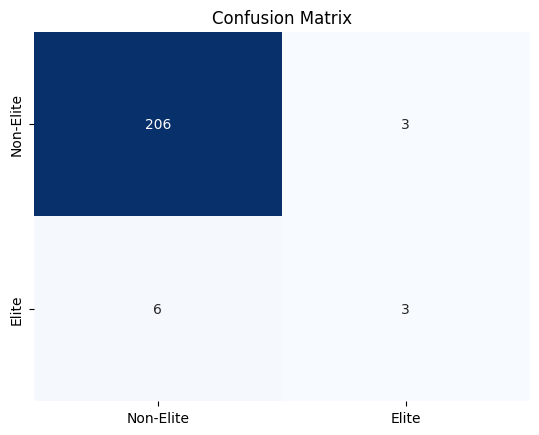

ROC AUC score:  0.6594896331738437


In [ ]:
# Make predictions
y_pred = clf_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.title('Confusion Matrix')
plt.show()

# Print ROC AUC score
print('ROC AUC score: ', roc_auc_score(y_test, y_pred))

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the grid search model
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_res, y_train_res)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters: ", best_params)

# Train a new classifier using the best parameters found by the grid search
clf_best = RandomForestClassifier(**best_params, random_state=42)
clf_best.fit(X_train_res, y_train_res)


### Results (cross-validation)

[0.91765481 0.89033539 0.9260812  0.92078553 0.84708738]
Average AUC-ROC with SMOTE for Random Forest: 0.9003888611740025
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1031
           1       0.47      0.36      0.41        55

    accuracy                           0.95      1086
   macro avg       0.72      0.67      0.69      1086
weighted avg       0.94      0.95      0.94      1086



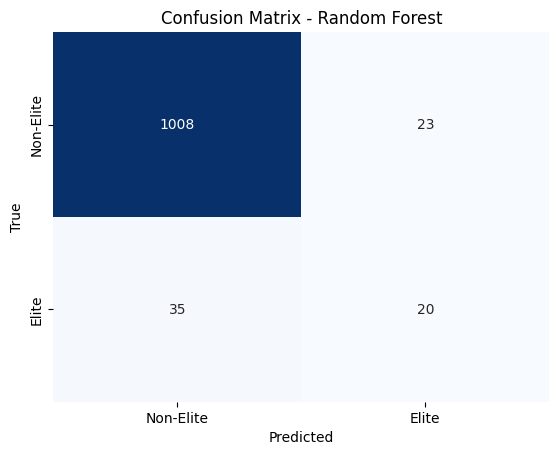

In [17]:
best_params = {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE

# Assuming X and y are your feature matrix and target variable
# Assuming best_params is your dictionary of hyperparameters

# Create the RandomForestClassifier with the best_params
clf_best = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')

# Specify the cross-validation strategy (StratifiedKFold is often used for classification tasks)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and the classifier using imbalanced-learn's make_pipeline
pipeline_rf = make_imb_pipeline(SMOTE(random_state=42), clf_best)

# Perform cross-validation
cv_scores = cross_val_score(pipeline_rf, X, y, cv=cv_strategy, scoring='roc_auc')
print(cv_scores)

# Print the average AUC-ROC across folds
print("Average AUC-ROC with SMOTE for Random Forest:", cv_scores.mean())

# Perform cross-validated predictions
predicted_labels_rf = cross_val_predict(pipeline_rf, X, y, cv=cv_strategy)

# Print the classification report
print("Classification Report:\n", classification_report(y, predicted_labels_rf))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels_rf)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Elite', 'Elite'],
            yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
cv_scores

array([0.91765481, 0.89033539, 0.9260812 , 0.92078553, 0.84708738])

### Feature Importance

In [ ]:
clf_best.fit(X_train_res, y_train_res)
# Get feature importances
importances_rf = clf_best.feature_importances_

# Convert importances to a DataFrame
importances_rf_df = pd.DataFrame({'feature': X.columns, 'importance': importances_rf})

# Sort DataFrame by importance
importances_rf_df = importances_rf_df.sort_values('importance', ascending=False)

# Print feature importances
print(importances_rf_df)


                feature  importance
5          wg_avg_value    0.262864
7            wg_avg_pot    0.137959
16  wg_avg_views_titles    0.085235
6           wg_avg_ovrl    0.077769
18  wg_avg_num_comments    0.057545
15    wg_avg_num_titles    0.048060
10           wg_avg_pas    0.039394
13           wg_avg_phy    0.037957
8            wg_avg_pac    0.036353
17      wg_avg_comments    0.028147
2            wg_avg_gls    0.027216
9            wg_avg_sho    0.026075
1            wg_avg_min    0.024725
11           wg_avg_dri    0.023884
3           wg_avg_asst    0.020769
0             wg_avg_mp    0.017936
12           wg_avg_def    0.016980
4       wg_avg_gls_asst    0.016262
14        wg_avg_titles    0.014868


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Define the 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store feature importances for each fold
importances_per_fold = []

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data for this fold
    clf_best.fit(X_train, y_train)

    # Store feature importances for this fold
    importances_per_fold.append(clf_best.feature_importances_)

# Convert the list of arrays to a NumPy array for easier manipulation
importances_per_fold = np.array(importances_per_fold)

# Calculate the mean importance across folds
mean_importances = np.mean(importances_per_fold, axis=0)

# Convert importances to a DataFrame
importances_df = pd.DataFrame({'feature': X.columns, 'importance': mean_importances})

# Sort DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=False)

# Print feature importances
print(importances_df)

                feature  importance
5          wg_avg_value    0.248030
7            wg_avg_pot    0.144801
15  wg_avg_views_titles    0.091360
6           wg_avg_ovrl    0.091267
14    wg_avg_num_titles    0.055712
10           wg_avg_pas    0.051828
11           wg_avg_dri    0.039501
16      wg_avg_comments    0.038446
13           wg_avg_phy    0.038416
8            wg_avg_pac    0.037591
9            wg_avg_sho    0.032907
12           wg_avg_def    0.027298
4       wg_avg_gls_asst    0.024436
0             wg_avg_mp    0.020940
2            wg_avg_gls    0.020839
1            wg_avg_min    0.020437
3           wg_avg_asst    0.016192


## Gradient Boosting

### Main GB

In [19]:
# Initialize the model
best_params_gb = {'learning_rate': 0.3, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
gb_best = GradientBoostingClassifier(**best_params_gb, random_state=42)
gb_best.fit(X_train_res, y_train_res)

# Train the model
gb_best.fit(X_train_res, y_train_res)

# Make predictions
y_pred_gb = gb_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb))

# Print confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Print ROC AUC score
print('ROC AUC score: ', roc_auc_score(y_test, y_pred_gb))


NameError: name 'X_train_res' is not defined

In [ ]:
# Define the parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.5, 0.7, 1]
}

# Initialize the grid search model
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='roc_auc', verbose=2, n_jobs=-1)

# Fit the grid search to the data
grid_search_gb.fit(X_train_res, y_train_res)

# Get the best parameters
best_params_gb = grid_search_gb.best_params_
print("Best parameters: ", best_params_gb)


Fitting 5 folds for each of 3240 candidates, totalling 16200 fits


### Cross-validation GB

In [14]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# Train a new classifier using the best parameters found by the grid search
best_params_gb = {'learning_rate': 0.3, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
gb_best = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Specify the cross-validation strategy (StratifiedKFold is often used for classification tasks)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and the classifier using imbalanced-learn's make_pipeline
pipeline_gb = make_imb_pipeline(SMOTE(random_state=42), gb_best)

# Perform cross-validation
cv_scores_gb = cross_val_score(pipeline_gb, X, y, cv=cv_strategy, scoring='roc_auc')
print(cv_scores_gb)

# Print the average AUC-ROC across folds
print("Average AUC-ROC with SMOTE for Gradient Boosting:", cv_scores_gb.mean())

# Perform cross-validated predictions
predicted_labels_gb = cross_val_predict(pipeline_gb, X, y, cv=cv_strategy)

# Print the classification report
print("Classification Report:\n", classification_report(y, predicted_labels_gb))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels_gb)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Elite', 'Elite'],
            yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


NameError: name 'GradientBoostingClassifier' is not defined

### Feature Importance

In [ ]:
gb_best.fit(X_train_res, y_train_res)
# Get feature importances
importances_gb = gb_best.feature_importances_

# Convert importances to a DataFrame
importances_gb_df = pd.DataFrame({'feature': X.columns, 'importance': importances_gb})

# Sort DataFrame by importance
importances_gb_df = importances_gb_df.sort_values('importance', ascending=False)

# Print feature importances
print(importances_gb_df)


                feature  importance
5          wg_avg_value    0.579393
13           wg_avg_phy    0.072632
6           wg_avg_ovrl    0.040702
16  wg_avg_views_titles    0.034716
15    wg_avg_num_titles    0.028137
9            wg_avg_sho    0.027491
2            wg_avg_gls    0.026500
3           wg_avg_asst    0.024286
17      wg_avg_comments    0.023779
18  wg_avg_num_comments    0.023611
10           wg_avg_pas    0.020734
8            wg_avg_pac    0.020355
7            wg_avg_pot    0.017865
4       wg_avg_gls_asst    0.014331
0             wg_avg_mp    0.010164
1            wg_avg_min    0.009888
11           wg_avg_dri    0.009683
14        wg_avg_titles    0.009602
12           wg_avg_def    0.006130


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Define the 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an array to store feature importances for each fold
importances_per_fold = []

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data for this fold
    gb_best.fit(X_train, y_train)

    # Store feature importances for this fold
    importances_per_fold.append(gb_best.feature_importances_)

# Convert the list of arrays to a NumPy array for easier manipulation
importances_per_fold = np.array(importances_per_fold)

# Calculate the mean importance across folds
mean_importances = np.mean(importances_per_fold, axis=0)

# Convert importances to a DataFrame
importances_df = pd.DataFrame({'feature': X.columns, 'importance': mean_importances})

# Sort DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=False)

# Print feature importances
print(importances_df)

                feature  importance
5          wg_avg_value    0.222944
0             wg_avg_mp    0.136882
1            wg_avg_min    0.066535
7            wg_avg_pot    0.063288
12           wg_avg_def    0.052577
8            wg_avg_pac    0.049618
16      wg_avg_comments    0.046546
4       wg_avg_gls_asst    0.045222
15  wg_avg_views_titles    0.044595
6           wg_avg_ovrl    0.041351
14    wg_avg_num_titles    0.039867
17  wg_avg_num_comments    0.034696
3           wg_avg_asst    0.030041
10           wg_avg_pas    0.028821
13           wg_avg_phy    0.025636
9            wg_avg_sho    0.025060
11           wg_avg_dri    0.024115
2            wg_avg_gls    0.022206


## Support Vector Machine

### Main SVM

Best parameters:  {'C': 10, 'gamma': 0.001}
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       209
           1       0.04      1.00      0.08         9

    accuracy                           0.05       218
   macro avg       0.52      0.50      0.05       218
weighted avg       0.96      0.05      0.02       218



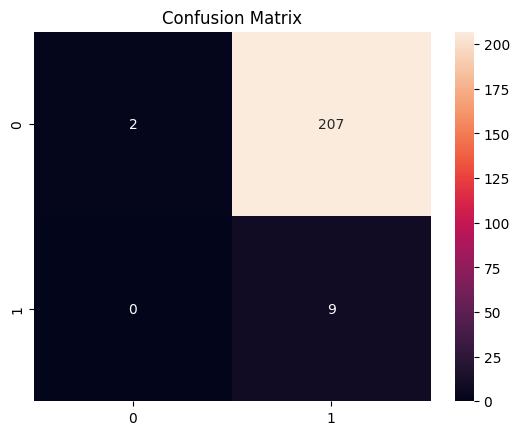

ROC AUC score:  0.5047846889952153


In [ ]:
from sklearn.svm import SVC

best_params_svc = {'C': 10, 'gamma': 0.001}
print("Best parameters: ", best_params_svc)

# Train a new classifier using the best parameters found by the grid search
svc_best = SVC(**best_params_svc, random_state=42, class_weight='balanced', probability=True)

# Initialize the model
# svc_best = SVC(C=1, gamma='scale', random_state=42, class_weight='balanced', )

# Train the model
svc_best.fit(X_train_res, y_train_res)

# Make predictions
y_pred_svc = svc_best.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_svc))

# Print confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Print ROC AUC score
print('ROC AUC score: ', roc_auc_score(y_test, y_pred_svc))

### Cross-validation SVM

Best parameters:  {'C': 10, 'gamma': 0.001}
[0.92490119 0.9223301  0.88393645 0.96425419 0.88570168]
Average AUC-ROC with SMOTE: 0.9162247208258183
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94      1031
           1       0.28      0.80      0.41        55

    accuracy                           0.88      1086
   macro avg       0.63      0.84      0.67      1086
weighted avg       0.95      0.88      0.91      1086



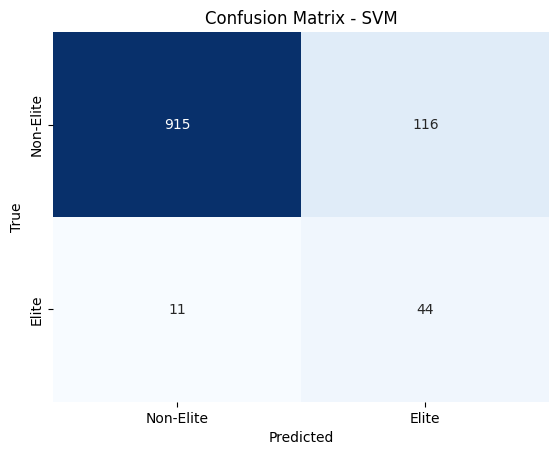

In [39]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

best_params_svc = {'C': 10, 'gamma': 0.001}
print("Best parameters: ", best_params_svc)

# Train a new classifier using the best parameters found by the grid search
svc_best = SVC(**best_params_svc, random_state=42, class_weight='balanced', probability=True)

# Specify the cross-validation strategy (StratifiedKFold is often used for classification tasks)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and the classifier using imbalanced-learn's make_pipeline
pipeline_svc = make_imb_pipeline(SMOTE(random_state=42), StandardScaler(), svc_best)

# Perform cross-validation
cv_scores_svc = cross_val_score(pipeline_svc, X, y, cv=cv_strategy, scoring='roc_auc')
print(cv_scores_svc)

# Print the average AUC-ROC across folds
print("Average AUC-ROC with SMOTE:", cv_scores_svc.mean())

# Perform cross-validated predictions
predicted_labels_svc = cross_val_predict(pipeline_svc, X, y, cv=cv_strategy)

# Print the classification report
print("Classification Report:\n", classification_report(y, predicted_labels_svc))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y, predicted_labels_svc)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Elite', 'Elite'],
            yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

### Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

svc_best.fit(X_train_res, y_train_res)
# Perform permutation importance
results = permutation_importance(svc_best, X_test, y_test, scoring='roc_auc')

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i, j in enumerate(importance):
    print('Feature %d: %s, Score: %.5f' % (i, X.columns[i], j))


Feature 0: wg_avg_mp, Score: 0.00000
Feature 1: wg_avg_min, Score: 0.17656
Feature 2: wg_avg_gls, Score: 0.00000
Feature 3: wg_avg_asst, Score: 0.00000
Feature 4: wg_avg_gls_asst, Score: 0.00000
Feature 5: wg_avg_value, Score: 0.36140
Feature 6: wg_avg_ovrl, Score: -0.00138
Feature 7: wg_avg_pot, Score: -0.00128
Feature 8: wg_avg_pac, Score: -0.00138
Feature 9: wg_avg_sho, Score: -0.00074
Feature 10: wg_avg_pas, Score: -0.00053
Feature 11: wg_avg_dri, Score: -0.00106
Feature 12: wg_avg_def, Score: -0.00064
Feature 13: wg_avg_phy, Score: -0.00181


In [ ]:
from sklearn.inspection import permutation_importance

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and the classifier
pipeline_svc = make_imb_pipeline(SMOTE(random_state=42), StandardScaler(), svc_best)

# Initialize a list to store the permutation importances for each fold
permutation_importances = []

# Perform cross-validation
for train_index, test_index in cv_strategy.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the pipeline on the training data
    pipeline_svc.fit(X_train, y_train)

    # Compute permutation importance on the test set
    result = permutation_importance(pipeline_svc, X_test, y_test, n_repeats=10, random_state=42, scoring='roc_auc')

    # Store the importances
    permutation_importances.append(result.importances_mean)

# Convert the list of arrays to a NumPy array for easier manipulation
permutation_importances = np.array(permutation_importances)

# Calculate the mean permutation importance across folds
mean_importances = np.mean(permutation_importances, axis=0)

# Convert importances to a DataFrame
importances_df = pd.DataFrame({'feature': X.columns, 'importance': mean_importances})

# Sort DataFrame by importance
importances_df = importances_df.sort_values('importance', ascending=False)

# Print feature importances
print(importances_df)

                feature  importance
5          wg_avg_value    0.156951
7            wg_avg_pot    0.061568
9            wg_avg_sho    0.017973
13           wg_avg_phy    0.017813
17      wg_avg_comments    0.009231
8            wg_avg_pac    0.007935
14        wg_avg_titles    0.005015
11           wg_avg_dri    0.004184
3           wg_avg_asst    0.002515
2            wg_avg_gls    0.002027
18  wg_avg_num_comments    0.001645
10           wg_avg_pas    0.001597
1            wg_avg_min    0.001438
4       wg_avg_gls_asst    0.001217
15    wg_avg_num_titles    0.001049
16  wg_avg_views_titles    0.000632
6           wg_avg_ovrl   -0.000580
12           wg_avg_def   -0.001648
0             wg_avg_mp   -0.004348


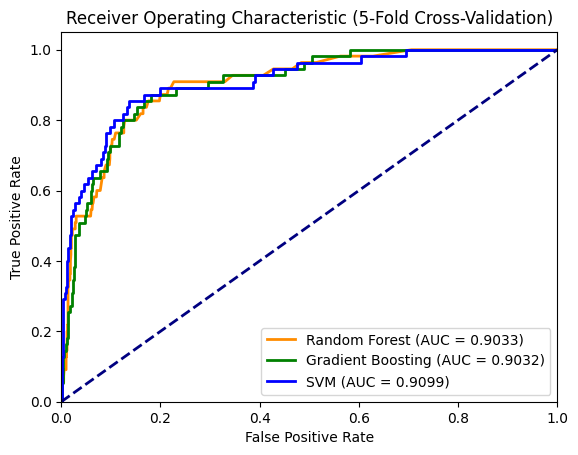

In [31]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Define the 5-fold cross-validation
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

########################### SVC #############################################
best_params_svc = {'C': 10, 'gamma': 0.001}

# Train a new classifier using the best parameters found by the grid search
svc_best = SVC(**best_params_svc, random_state=42, class_weight='balanced', probability=True)

# Specify the cross-validation strategy (StratifiedKFold is often used for classification tasks)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and the classifier using imbalanced-learn's make_pipeline
pipeline_svc = make_imb_pipeline(SMOTE(random_state=42), StandardScaler(), svc_best)
#############################################################################

########################### GB #############################################
best_params_gb = {'learning_rate': 0.3, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.7}
gb_best = GradientBoostingClassifier(**best_params_gb, random_state=42)

# Specify the cross-validation strategy (StratifiedKFold is often used for classification tasks)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and the classifier using imbalanced-learn's make_pipeline
pipeline_gb = make_imb_pipeline(SMOTE(random_state=42), gb_best)
#############################################################################

########################### RF #############################################
clf_best = RandomForestClassifier(**best_params, random_state=42, class_weight='balanced')

# Specify the cross-validation strategy (StratifiedKFold is often used for classification tasks)
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a pipeline with SMOTE and the classifier using imbalanced-learn's make_pipeline
pipeline_rf = make_imb_pipeline(SMOTE(random_state=42), clf_best)
#############################################################################



# Generate predictions for each classifier using 5-fold cross-validation
y_pred_rf = cross_val_predict(pipeline_rf, X_rf, y_rf, cv=cv_strategy, method="predict_proba")[:, 1]
y_pred_gb = cross_val_predict(pipeline_gb, X_gb, y_gb, cv=cv_strategy, method="predict_proba")[:, 1]
y_pred_svc = cross_val_predict(pipeline_svc, X_svm, y_svm, cv=cv_strategy, method="decision_function")

# Compute ROC curve and ROC area for each classifier
fpr_rf, tpr_rf, _ = roc_curve(y_rf, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_gb, y_pred_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_svc, tpr_svc, _ = roc_curve(y_svm, y_pred_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='Random Forest (AUC = %0.4f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, color='green', lw=lw, label='Gradient Boosting (AUC = %0.4f)' % roc_auc_gb)
plt.plot(fpr_svc, tpr_svc, color='blue', lw=lw, label='SVM (AUC = %0.4f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (5-Fold Cross-Validation)')
plt.legend(loc="lower right")
plt.show()

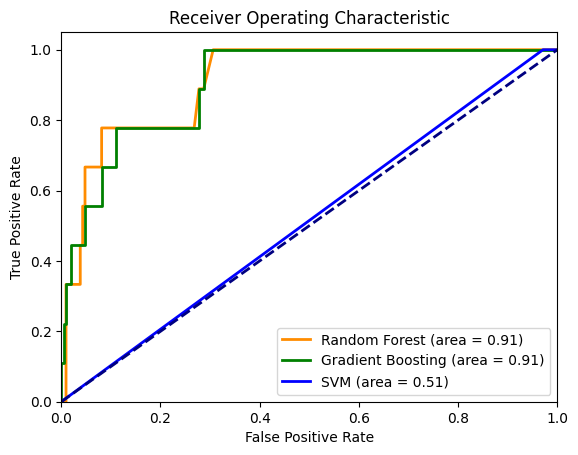

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class

fpr_rf, tpr_rf, _ = roc_curve(y_test, clf_best.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb_best.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

# Perform cross-validated predictions
predicted_labels_gb = cross_val_predict(pipeline_gb, X, y, cv=cv_strategy)

fpr_svc, tpr_svc, _ = roc_curve(y_test, svc_best.decision_function(X_test))
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=lw, label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, color='green', lw=lw, label='Gradient Boosting (area = %0.2f)' % roc_auc_gb)
plt.plot(fpr_svc, tpr_svc, color='blue', lw=lw, label='SVM (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Unsupervised learning

## Isolation Forest



* Isolation Forest is an ensemble-based algorithm that works by randomly selecting features and creating isolation trees to isolate anomalies. Anomalies are expected to be isolated faster than normal instances.
* It is particularly effective for high-dimensional datasets and is less sensitive to outliers in the majority class.
* For this we're using a "Supervised Variant" where you train the model only on normal instances and then identify instances with lower outlier scores as anomalies



### Without Standarization:

In [ ]:
mayority_class = sorted(Counter(y_train).items())[0][1]
minority_class = sorted(Counter(y_train).items())[1][1]
ratio = minority_class/(mayority_class + minority_class)

# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} \
records for the majority class and {sorted(Counter(y_train).items())[1][1]} \
records for the \nminority class, resulting in {ratio} percentage of the minority class in the entire dataset.")

The number of records in the training dataset is 917
The number of records in the test dataset is 230
The training dataset has 852 records for the majority class and 65 records for the 
minority class, resulting in 0.07088331515812432 percentage of the minority class in the entire dataset.


In [ ]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
model_IsFo = IsolationForest(contamination=0.07)  # Set contamination based on the percentage of anomalies in your dataset

# Train the model
model_IsFo.fit(X_train)  # X_train is your training data

# Predict anomalies
predictions = model_IsFo.predict(X_test)  # X_test is your test data



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Change the anomalies' values to make it consistent with the true values
predictions_IsFo = [1 if i==-1 else 0 for i in predictions_IsFo]
print(classification_report(y_test, predictions_IsFo))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_IsFo)
print(f'AUC-ROC: {auc_roc:.4f}')


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       211
           1       0.30      0.32      0.31        19

    accuracy                           0.88       230
   macro avg       0.62      0.62      0.62       230
weighted avg       0.89      0.88      0.88       230

AUC-ROC: 0.6247


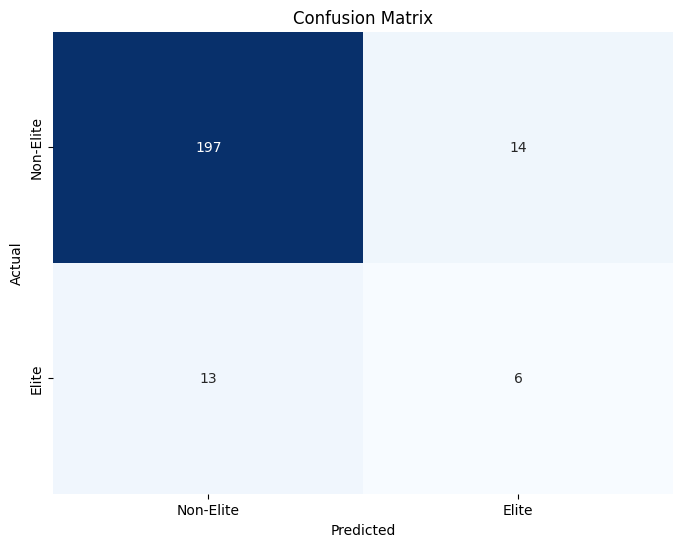

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_IsFo)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### With Standarization:

In [ ]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
model_IsFo_scaled = IsolationForest(contamination=0.07)  # Set contamination based on the percentage of anomalies in your dataset

# Train the model
model_IsFo_scaled.fit(X_train_scaled)  # X_train is your training data

# Predict anomalies
predictions_IsFo_scaled = model_IsFo_scaled.predict(X_test_scaled)  # X_test is your test data



In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Change the anomalies' values to make it consistent with the true values
predictions_IsFo_scaled = [1 if i==-1 else 0 for i in predictions_IsFo_scaled]
print(classification_report(y_test, predictions_IsFo_scaled))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_IsFo_scaled)
print(f'AUC-ROC: {auc_roc:.4f}')


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       211
           1       0.22      0.21      0.22        19

    accuracy                           0.87       230
   macro avg       0.58      0.57      0.57       230
weighted avg       0.87      0.87      0.87       230

AUC-ROC: 0.5721


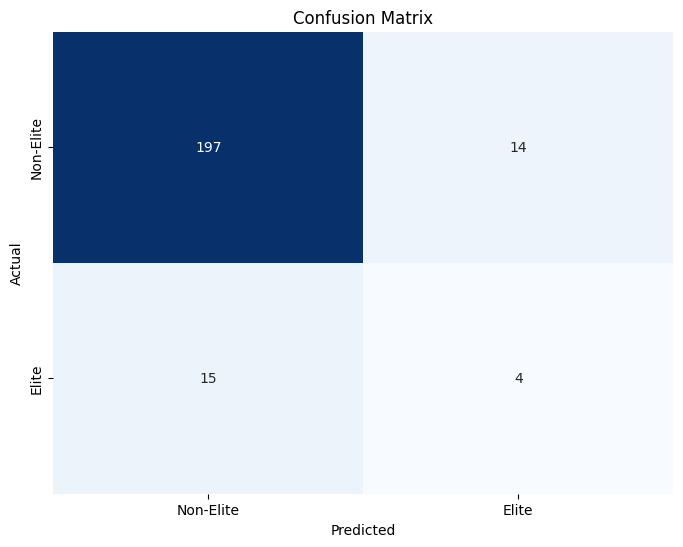

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_IsFo_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import IsolationForest

# Create the Isolation Forest model
model_IsFo_supervised_scaled = IsolationForest(contamination=0.07)  # Set contamination based on the percentage of anomalies in your dataset

# Train the model
model_IsFo_supervised_scaled.fit(X_train_scaled)  # X_train is your training data

# Predict anomalies
predictions_IsFo_scaled = model_IsFo_supervised_scaled.predict(X_test_scaled)  # X_test is your test data

## One-Class SVM



* One-Class SVM is a machine learning algorithm that is trained only on the normal instances. It learns a boundary that encapsulates the normal data, and instances outside this boundary are considered anomalies.
* It's useful for situations where you have mostly normal instances and want to detect rare anomalies.
* Sandarization can be crucial in this algorithm.



In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, roc_auc_score

# Create One-Class Support Vector Machine model
model_svm = OneClassSVM(nu=0.05)
model_svm.fit(X_train)

# Predict anomalies
predictions_svm = model_svm.predict(X_test)

In [ ]:
# Change the anomalies' values to make it consistent with the true values
predictions_svm = [1 if i==-1 else 0 for i in predictions_svm]
print(classification_report(y_test, predictions_svm))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_svm)
print(f'AUC-ROC: {auc_roc:.4f}')

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       211
           1       0.33      0.21      0.26        19

    accuracy                           0.90       230
   macro avg       0.63      0.59      0.60       230
weighted avg       0.88      0.90      0.89       230

AUC-ROC: 0.5863


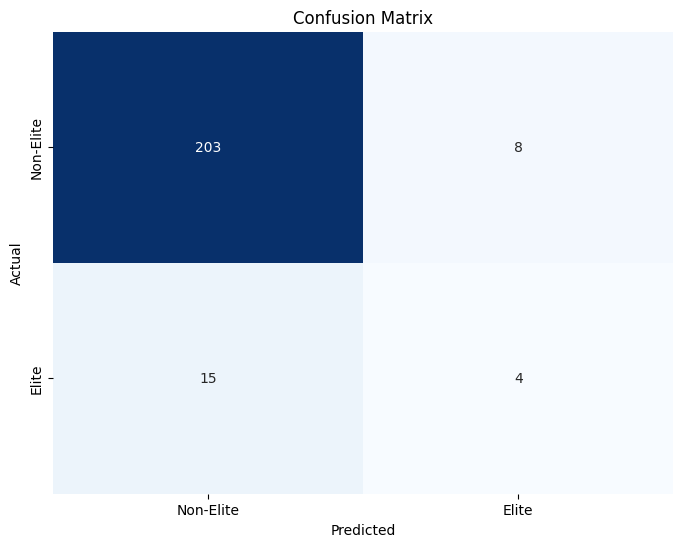

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, roc_auc_score

# With standarization
model_svm_scaled = OneClassSVM(nu=0.05)  # Adjust nu based on your dataset
model_svm_scaled.fit(X_train_scaled)

# Predict anomalies
predictions_svm_scaled = model_svm_scaled.predict(X_test_scaled)

In [ ]:
# Change the anomalies' values to make it consistent with the true values
predictions_svm_scaled = [1 if i==-1 else 0 for i in predictions_svm_scaled]
print(classification_report(y_test, predictions_svm_scaled))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_svm_scaled)
print(f'AUC-ROC: {auc_roc:.4f}')

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       211
           1       0.19      0.16      0.17        19

    accuracy                           0.87       230
   macro avg       0.56      0.55      0.55       230
weighted avg       0.86      0.87      0.87       230

AUC-ROC: 0.5481


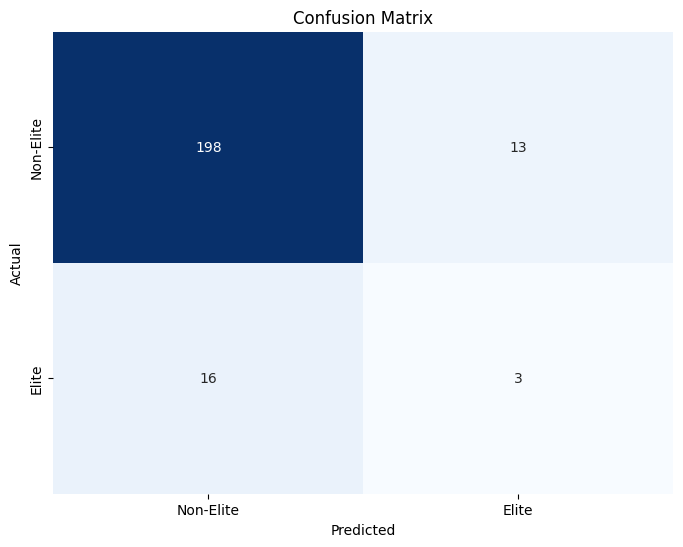

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_svm_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Local Outlier Factor



*   LOF measures the local density deviation of a data point with respect to its neighbors. Anomalies are identified as data points with significantly lower density compared to their neighbors.
* Not inherently sensitive to scale



In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, roc_auc_score

# Train Local Outlier Factor (LOF)
model_lof = LocalOutlierFactor(n_neighbors=20, contamination=0.07)  # Contamination set to the 7% of outliers
model_lof.fit(X_train)

# Assuming X_test is your test data
predictions_lof = model_lof.fit_predict(X_test)


In [ ]:
# Change the anomalies' values to make it consistent with the true values
predictions_lof = [1 if i==-1 else 0 for i in predictions_lof]
print(classification_report(y_test, predictions_lof))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_lof)
print(f'AUC-ROC: {auc_roc:.4f}')

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       211
           1       0.41      0.37      0.39        19

    accuracy                           0.90       230
   macro avg       0.68      0.66      0.67       230
weighted avg       0.90      0.90      0.90       230

AUC-ROC: 0.6605


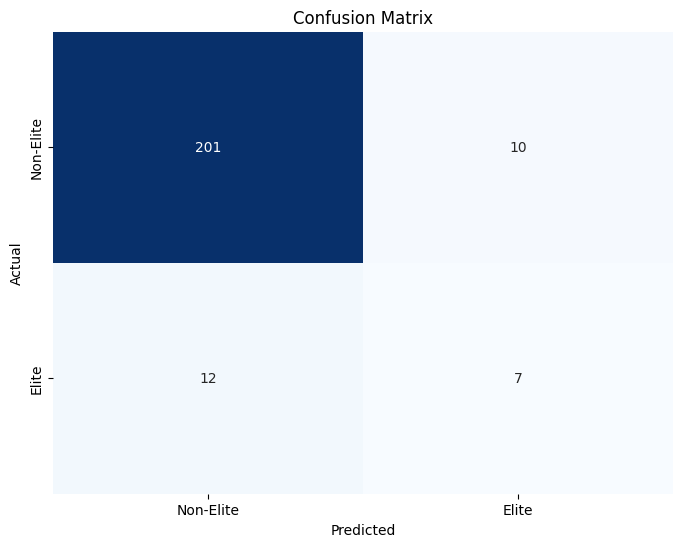

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_lof)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Elliptic Evolve



*   This algorithm fits a multivariate Gaussian distribution to the majority class and identifies anomalies based on deviations from this distribution. It assumes that the majority class is Gaussian distributed.



### Without Standarization:

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Build Elliptic Envelope Model
model_ee = EllipticEnvelope(contamination=0.07)  # Adjust contamination based on your dataset
model_ee.fit(X_train)

predictions_ee = model_ee.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

predictions_ee = [1 if i==-1 else 0 for i in predictions_ee]
# Assuming y_test is your true labels
print(classification_report(y_test, predictions_ee))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_ee)
print(f'AUC-ROC: {auc_roc:.4f}')



              precision    recall  f1-score   support

           0       0.96      0.96      0.96       211
           1       0.55      0.58      0.56        19

    accuracy                           0.93       230
   macro avg       0.76      0.77      0.76       230
weighted avg       0.93      0.93      0.93       230

AUC-ROC: 0.7681


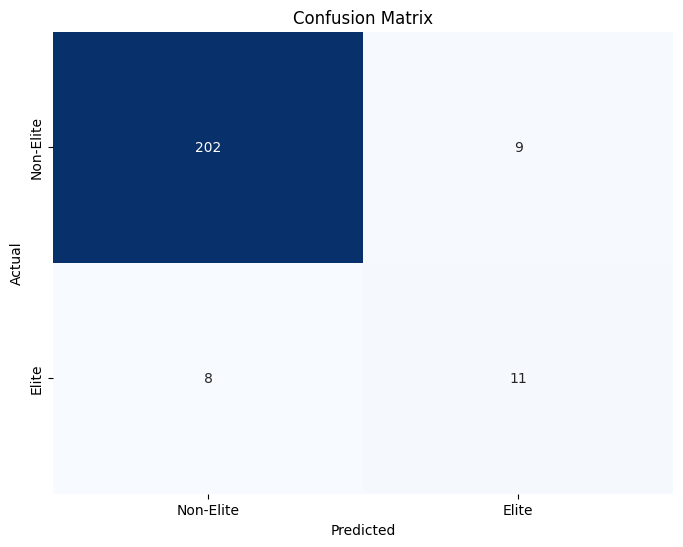

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_ee)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### With Standarization:

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Build Elliptic Envelope Model
model_ee_scaled = EllipticEnvelope(contamination=0.07)  # Adjust contamination based on your dataset
model_ee_scaled.fit(X_train_scaled)

predictions_ee_scaled = model_ee_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

predictions_ee_scaled = [1 if i==-1 else 0 for i in predictions_ee_scaled]
# Assuming y_test is your true labels
print(classification_report(y_test, predictions_ee_scaled))

# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, predictions_ee_scaled)
print(f'AUC-ROC: {auc_roc:.4f}')



              precision    recall  f1-score   support

           0       0.96      0.94      0.95       211
           1       0.48      0.58      0.52        19

    accuracy                           0.91       230
   macro avg       0.72      0.76      0.74       230
weighted avg       0.92      0.91      0.92       230

AUC-ROC: 0.7610


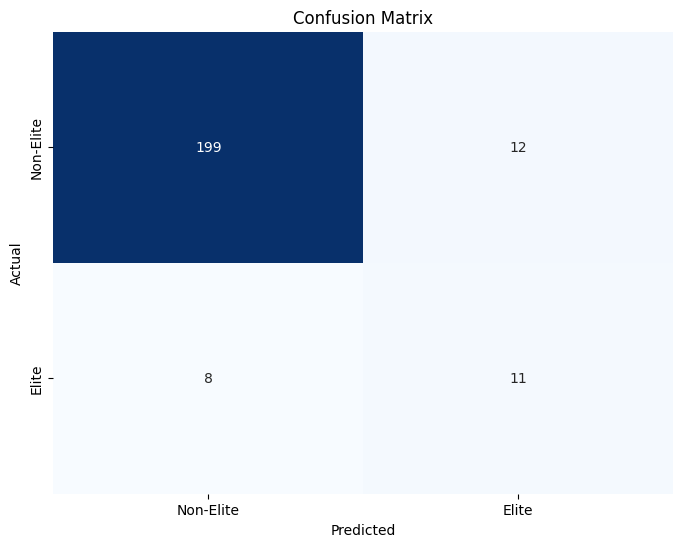

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions_ee_scaled)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cbar=False, fmt='d', cmap='Blues', xticklabels=['Non-Elite', 'Elite'], yticklabels=['Non-Elite', 'Elite'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()